## Introduction

* The dataset has been obtained from insideairbnb.com - a website which compiles comprehensive data from publicly available Airbnb listings worldwide, updated monthly.
* The dataset used includes all San Francisco listings from September 2022 to September 2023, totaling xxxx rows and 75 columns, providing information on location, neighborhood, pricing, reviews, listing details, and hosts, among other details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from io import BytesIO
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# loading data
url = "http://data.insideairbnb.com/united-states/ca/san-francisco/2023-06-05/data/listings.csv.gz"
df = pd.read_csv(url, compression='gzip', error_bad_lines=False)

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7923146,https://www.airbnb.com/rooms/7923146,20230605012656,2023-06-05,city scrape,Condo in San Francisco · ★4.95 · 2 bedrooms · ...,Great views! <br />Excellent location!<br />2b...,Our location is what you expect of SF. <br />H...,https://a0.muscache.com/pictures/100949457/891...,41781093,...,5.0,4.99,4.74,STR-0005824,f,1,1,0,0,1.59
1,53610593,https://www.airbnb.com/rooms/53610593,20230605012656,2023-06-05,city scrape,Serviced apartment in San Francisco · 1 bedroo...,Welcome to turn-key living in San Francisco wi...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,415840703,...,5.0,5.00,5.00,NaN,f,32,32,0,0,0.15
2,37236213,https://www.airbnb.com/rooms/37236213,20230605012656,2023-06-05,city scrape,Condo in San Francisco · ★5.0 · 2 bedrooms · 2...,Fabulous condo right in the heart of Noe Valle...,Noe Valley is one of San Francisco's most soug...,https://a0.muscache.com/pictures/8abe5a46-0ae1...,10485472,...,5.0,5.00,5.00,NaN,f,1,1,0,0,0.29
3,895375422068459057,https://www.airbnb.com/rooms/895375422068459057,20230605012656,2023-06-05,city scrape,Home in San Francisco · ★New · 1 bedroom · 1 b...,"Say what you want about San Francisco. Still, ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,16267088,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,438940,https://www.airbnb.com/rooms/438940,20230605012656,2023-06-05,city scrape,Condo in San Francisco · ★4.86 · 1 bedroom · 1...,You will be the only guest in a classic Edward...,Located on Castro Street between 19th and 20th...,https://a0.muscache.com/pictures/miso/Hosting-...,1841207,...,4.9,4.95,4.75,NaN,f,1,0,1,0,0.95


## Data Cleaning

In [3]:
# check data shape
print(df.shape)

(7208, 75)


In [4]:
# check all fields
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
# keep columns relevant to the project
relevant_cols = ['neighbourhood_cleansed','latitude','longitude','host_since','host_response_time', 'host_response_rate','host_is_superhost','calculated_host_listings_count','host_identity_verified','property_type',
            'room_type', 'accommodates','bedrooms','beds','price']
df = df[relevant_cols]
df.sample(n=5)

,neighbourhood_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate,host_is_superhost,calculated_host_listings_count,host_identity_verified,property_type,room_type,accommodates,bedrooms,beds,price
6712,Noe Valley,37.755250,-122.438830,2015-01-04,within an hour,100%,t,4,t,Entire cottage,Entire home/apt,2,1.0,1.0,$150.00
139,Outer Richmond,37.775017,-122.492188,2012-10-17,within an hour,100%,t,1,t,Entire guest suite,Entire home/apt,3,1.0,1.0,$200.00
5176,Bernal Heights,37.742680,-122.415770,2010-11-22,within an hour,100%,NaN,1,t,Private room in home,Private room,2,NaN,1.0,$66.00
5980,Mission,37.749494,-122.424465,2023-02-07,within an hour,100%,f,1,t,Entire guest suite,Entire home/apt,3,1.0,2.0,$180.00
237,Russian Hill,37.802130,-122.415160,2015-11-05,a few days or more,0%,f,1,f,Entire condo,Entire home/apt,2,1.0,1.0,$165.00


In [6]:
# rename 'neighbourhood_cleansed' & 'calculated_host_listings_count'
df.rename(columns={'neighbourhood_cleansed':'neighbourhood', 'calculated_host_listings_count':'host_listings_count'}, inplace=True)

In [7]:
# drop rows where target value (price) is 0
df = df[df['price'] != 0]

In [8]:
# check missing values
df.isnull().sum()

neighbourhood                0
latitude                     0
longitude                    0
host_since                   0
host_response_time        1088
host_response_rate        1088
host_is_superhost         1777
host_listings_count          0
host_identity_verified       0
property_type                0
room_type                    0
accommodates                 0
bedrooms                  2540
beds                       118
price                        0
dtype: int64

Since significant data **(> 15%)** is missing from **'host_response_time', 'host_response_rate', 'host_is_superhost' & 'bedrooms'**, these columns are dropped.

In [9]:
# drop columns with significant data missing
df.drop(['host_response_time','host_response_rate','host_is_superhost','bedrooms'], axis=1, inplace=True)

In [10]:
# check data types
df.dtypes

neighbourhood              object
latitude                  float64
longitude                 float64
host_since                 object
host_listings_count         int64
host_identity_verified     object
property_type              object
room_type                  object
accommodates                int64
beds                      float64
price                      object
dtype: object

In [11]:
# clean 'price' column, and change its data type
df['price'] = df['price'].str.replace('$','').str.replace(',','').astype('float')

In [12]:
# change data type of categorical columns
df[['property_type', 'room_type']] = df[['property_type', 'room_type']].astype('category')

In [13]:
# clean boolean column and change data type
df['host_identity_verified'] = df['host_identity_verified'].replace({'f': 0, 't': 1}).astype(int)

In [14]:
# clean and change data type of beds
df['beds'] = df['beds'].fillna(0).astype(int)

# fill missing values in 'beds'
def calculate_mode(group):
    return group.mode().iloc[0]

grouped = df.groupby(['room_type', 'accommodates'])
mode_beds = grouped['beds'].transform(calculate_mode)
df['beds'] = df['beds'].fillna(mode_beds)

In [15]:
# confirm no value is missing
df.isnull().sum()

neighbourhood             0
latitude                  0
longitude                 0
host_since                0
host_listings_count       0
host_identity_verified    0
property_type             0
room_type                 0
accommodates              0
beds                      0
price                     0
dtype: int64

## Exploratory Data Analysis

In [16]:
# descriptive stats for target column 'price'
df['price'].describe()

count     7208.000000
mean       348.344617
std       1630.442004
min          0.000000
25%        100.000000
50%        160.000000
75%        261.000000
max      71499.000000
Name: price, dtype: float64

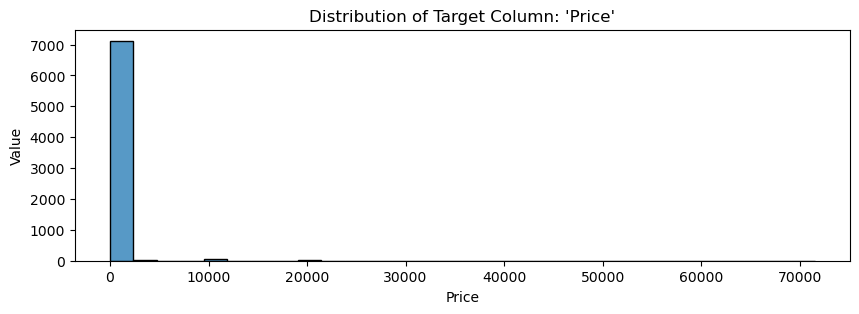

In [17]:
# distribution of target column
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x='price', bins=30)
plt.xlabel('Price')
plt.ylabel('Value')
plt.title("Distribution of Target Column: 'Price'")
plt.show()

Distribution for the 'price' column looks highly skewed. Using a **box plot** would provide additional insights into outliers.

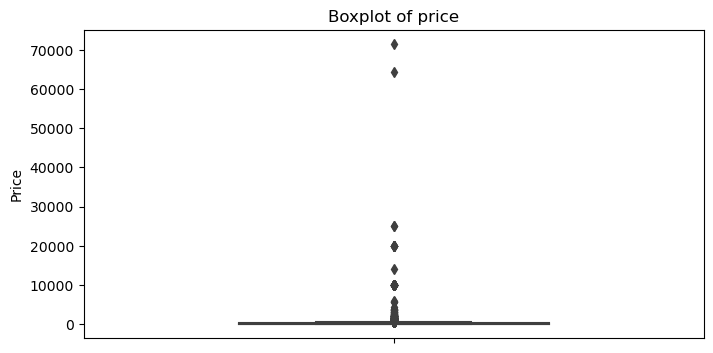

In [18]:
# boxplot of target column
plt.figure(figsize=(8, 4)) 
sns.boxplot(data=df, y='price', orient='vertical', width=0.5)
plt.title('Boxplot of price')
plt.ylabel('Price')
plt.show()

The box plot indicates the presence of outliers. Applying a **log transformation** will normalize the distribution, stabilize variance, and enhance model performance.

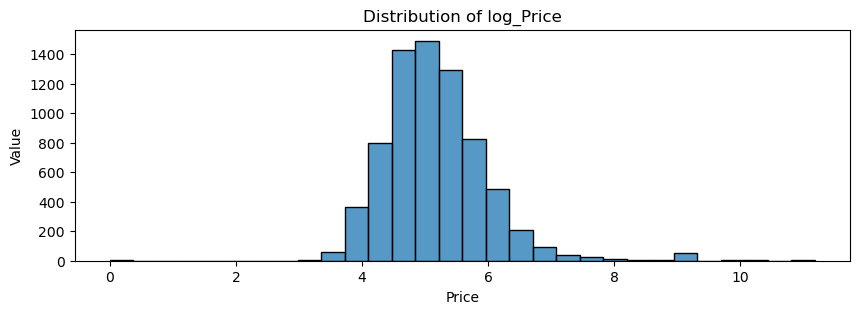

In [19]:
# apply log transformation
df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(10, 3))
sns.histplot(data=df, x='log_price', bins=30)
plt.xlabel('Price')
plt.ylabel('Value')
plt.title("Distribution of log_Price")
plt.show()

### Other Visualizations

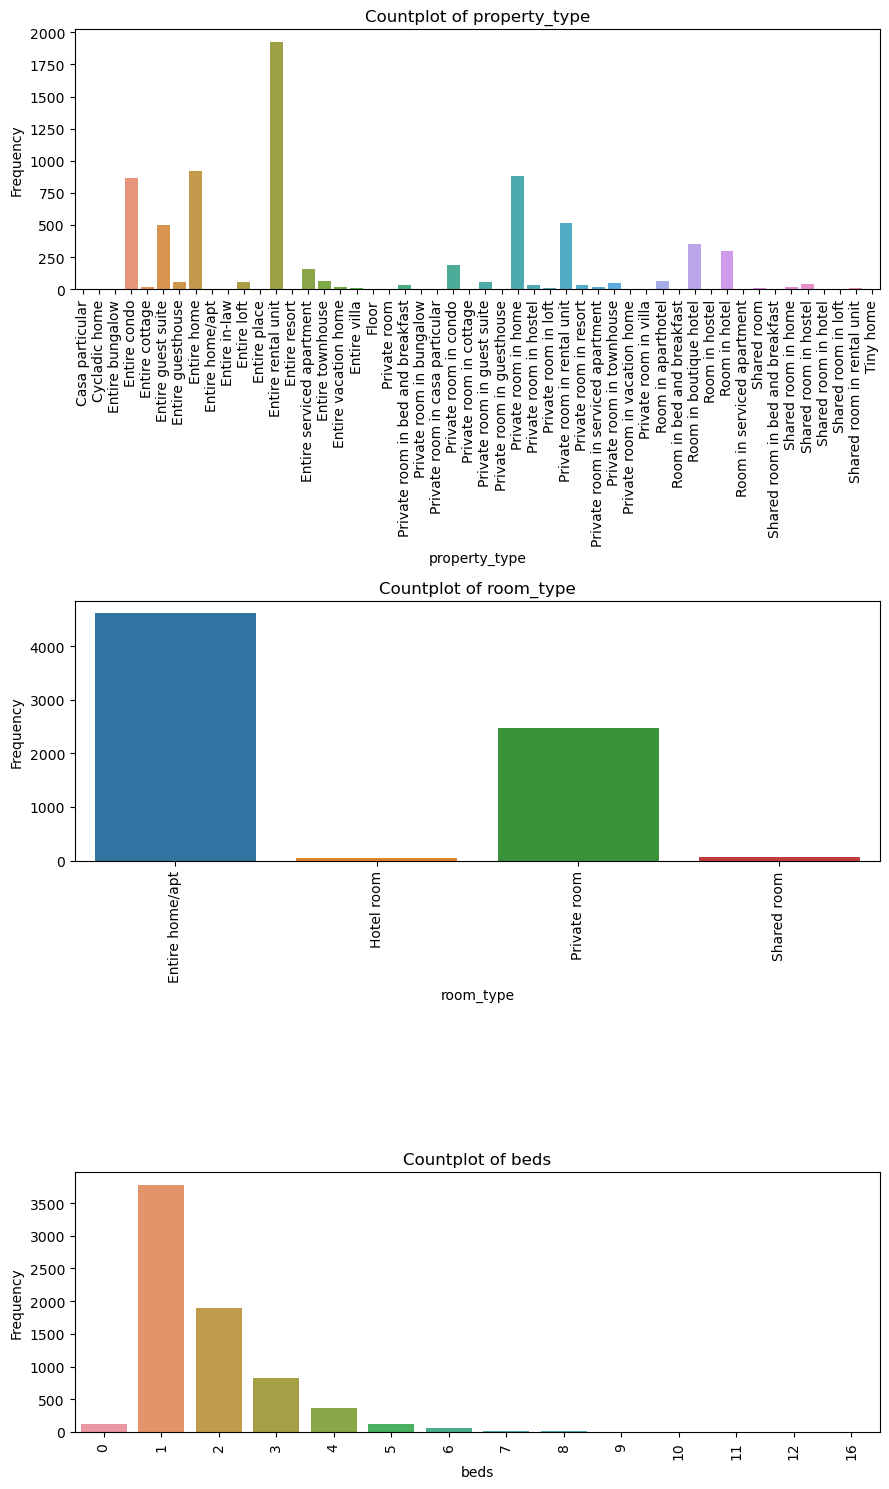

In [20]:
# countplots
columns_to_plot = ['property_type', 'room_type', 'beds']
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(9,15))
for column, ax in zip(columns_to_plot, axes):
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f'Countplot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

* It is clear that most properties listed have either entire homes/apartments or private rooms available. 
* Entire rental unit is the most common property type. 'Entire condo', 'Private Room in home', 'Entire home' are some other common property types.

### Location Clustering

In [21]:
# convert latitude and longitude to radians
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].applymap(radians)

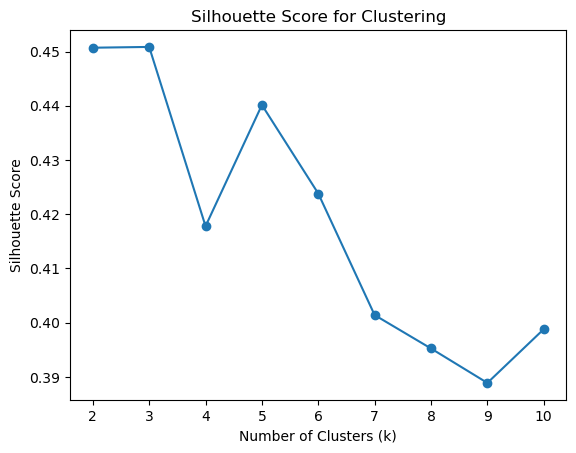

In [22]:
# check best K for clustering
X = df[['latitude', 'longitude']]
silhouette_scores = []

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=123)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Clustering')
plt.show()

Best score is at **k=3**. This plot shows that creating more than 5 divisions will not significantly improve the separation and cohesion. 

k is selected as **5** as 3 clusters will be too less for our problem context.

In [23]:
# create location clusters as a feature, with k = 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
df['location_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

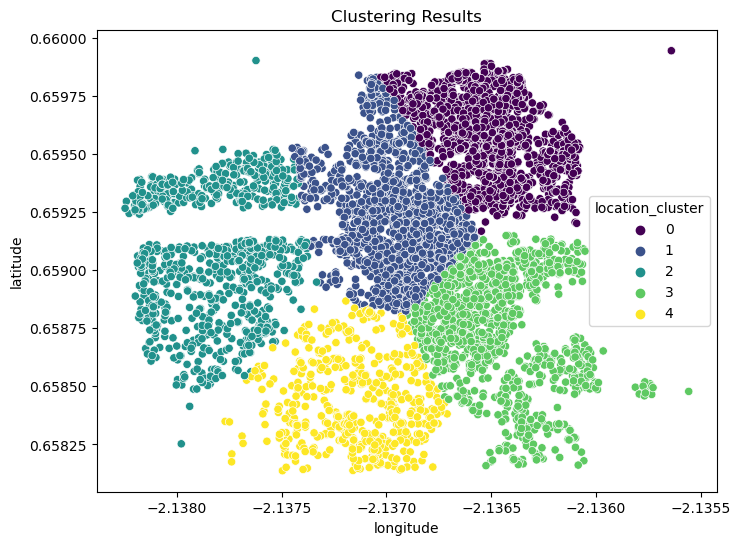

In [24]:
# scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='location_cluster', data=df, palette='viridis')
plt.title('Clustering Results')
plt.show()

Checking clustering with **Price**:

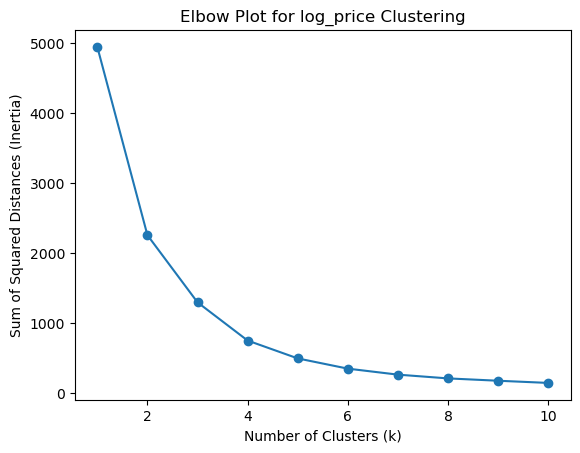

In [25]:
X_log_price = df[['log_price']]

# generate Elbow Plot
k_values_log_price = range(1, 11)
inertia_values_log_price = []

for k in k_values_log_price:
    kmeans_log_price = KMeans(n_clusters=k, random_state=123)
    kmeans_log_price.fit(X_log_price)
    inertia_values_log_price.append(kmeans_log_price.inertia_)

plt.plot(k_values_log_price, inertia_values_log_price, marker='o')
plt.title('Elbow Plot for log_price Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [26]:
optimal_k_log_price = 3  # based on the Elbow plot

# perform clustering with the chosen k
kmeans_log_price = KMeans(n_clusters=optimal_k_log_price, random_state=123)
df['log_price_cluster'] = kmeans_log_price.fit_predict(X_log_price)

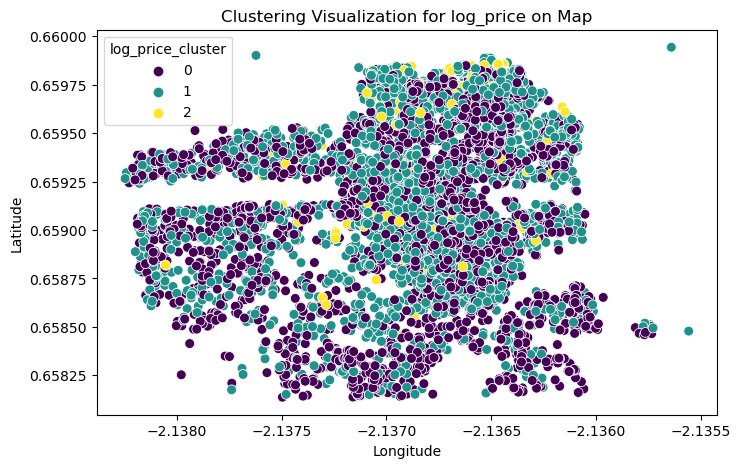

In [27]:
# display the clusters on a map
plt.figure(figsize=(8, 5))
sns.scatterplot(x='longitude', y='latitude', hue='log_price_cluster', data=df, palette='viridis', legend='full', s=50)
plt.title('Clustering Visualization for log_price on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

It is evident that meaningful clusters are not forming in this context.

In [28]:
# remove original lat and long features, as well as price clusters 
df = df.drop(['latitude', 'longitude', 'log_price_cluster'], axis=1)

In [29]:
df.to_csv('airbnb_dataset_clean.csv', index=False)